C:\Users\u.hojjimatov\AppData\Local\Temp\ipykernel_21768\2051515517.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['week_number'] = df_filtered['date_sales'].dt.isocalendar().week


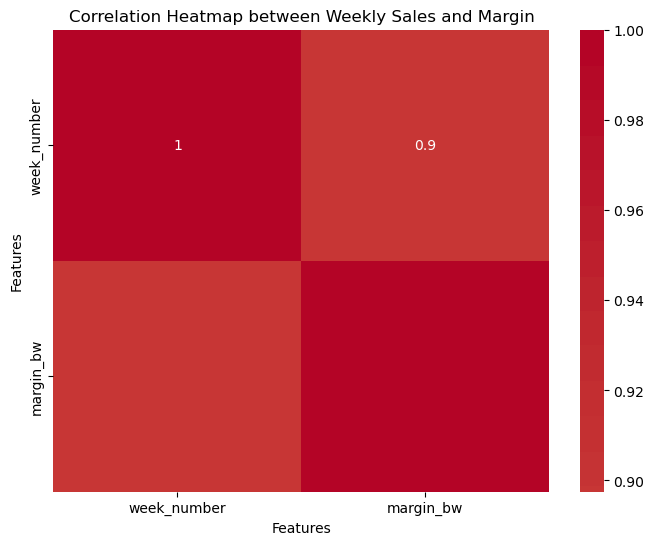

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Укажите свои данные для подключения к базе данных
db_user = 'postgres'
db_password = 'Cl2223942'
db_host = 'localhost'
db_port = '5432'
db_name = 'postgres'
table_name = 'prodaja_2024'

# Создаем строку подключения к базе данных
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Читаем данные из таблицы в DataFrame
df = pd.read_sql_table(table_name, con=engine)

# Преобразуем столбец date_sales в формат даты
df['date_sales'] = pd.to_datetime(df['date_sales'])

# Фильтруем данные по дате от 1 по 31 января 2024 года
df_filtered = df[(df['date_sales'] >= '2024-01-01') & (df['date_sales'] <= '2024-01-31')]

# Преобразуем столбец date_sales в номера недель
df_filtered['week_number'] = df_filtered['date_sales'].dt.isocalendar().week

# Группируем данные по неделям и вычисляем среднее значение маржи для каждой недели
df_weekly = df_filtered.groupby('week_number')['margin_bw'].mean().reset_index()

# Создаем тепловую карту корреляции
correlation_matrix = df_weekly.corr()

# Создаем тепловую карту с помощью seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Weekly Sales and Margin')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()




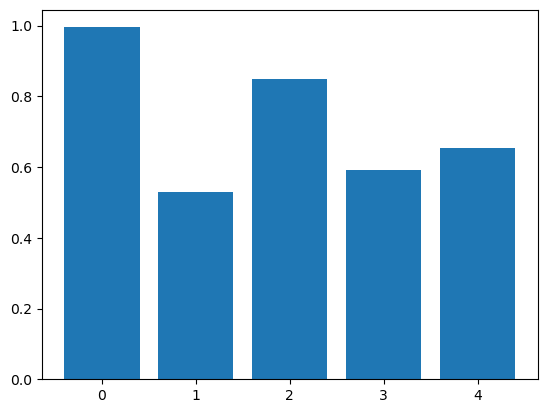

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Создаем данные для анимации
data = np.random.rand(10, 5)

# Инициализируем фигуру и оси
fig, ax = plt.subplots()

# Создаем пустую столбчатую диаграмму
bars = ax.bar(range(len(data[0])), data[0])

# Функция для обновления данных на каждом кадре анимации
def animate(i):
    for bar, h in zip(bars, data[i]):
        bar.set_height(h)
    return bars

# Создаем анимацию
ani = animation.FuncAnimation(fig, animate, frames=len(data), repeat=False)

# Отображаем анимацию
HTML(ani.to_jshtml())


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



data = pd.read_csv(r'C:\Users\u.hojjimatov\Downloads\Electric_Vehicle_Charging_Stations.csv')


data



,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)
...,...,...,...,...,...,...,...,...,...
380,Lee Partyka Chevrolet Mazda Isuzu,200 Skiff St,Hamden,Dealership business hours,NONE,3,NONE,NONE,POINT (-72.9100121 41.3729709)
381,777 MAIN ST,71 Asylum St,Hartford,24 hours daily,NONE,10,1,NONE,POINT (-72.674468 41.766676)
382,Norwich Public Utilities,173 N Main St,Norwich,24 hours daily,NONE,4,NONE,NONE,POINT (-72.063516 41.52757900000001)
383,Fairfield Plaza,116 Danbury Rd,New Milford,24 hours daily,NONE,NONE,1,NONE,POINT (-73.41763 41.55735)
